In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
# load data for red and white wines, then merge them to have all in one file.
# also create features describing type of wine (white or red)
red = pd.read_csv("winequality-red.csv", delimiter=';')
white = pd.read_csv("winequality-white.csv", delimiter=';')

# add new columns
red['winetype'] = 'red-wine'
white['winetype'] = 'white-wine'

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red-wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red-wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red-wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red-wine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red-wine


In [11]:
allwines = pd.concat([red, white], axis=0) #combine red and white data to a single dataframe
allwines = allwines.sample(frac=1) # randomize the dataframe, so they are mixed up

In [14]:
# define 'wine quality' based on the alcohol level, with >=7: high, >=5 medium, else low
allwines['wine-quality'] = allwines.loc[:,'quality'].apply(lambda x: 'low' if x <=5 else 'medium' if x<=7 else 'high')
# allwines['wine-quality'] = allwines['quality'].apply(lambda x: 'low' if x <=5 else 'medium' if x<=7 else 'high')

In [16]:
print(allwines.head())
allwines.to_csv("all_wines.csv",encoding='utf-8', index=False) # use index=False so the row index are not saved in the csv file.

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3902            6.1              0.22         0.38            2.80      0.144   
4408            5.7              0.29         0.16            7.90      0.044   
3570            6.9              0.26         0.27            4.20      0.031   
1874            7.9              0.29         0.31            7.35      0.034   
1782            8.5              0.21         0.26            9.25      0.034   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3902                 12.0                  65.0  0.99080  2.95       0.64   
4408                 48.0                 197.0  0.99512  3.21       0.36   
3570                 20.0                  80.0  0.99089  3.12       0.39   
1874                 37.0                 154.0  0.99380  3.06       0.31   
1782                 73.0                 142.0  0.99450  3.05       0.37   

      alcohol  quality    winetype wine-quality  


In [18]:
allwines['wine-quality'] = pd.Categorical(allwines['wine-quality'], categories=['low','medium','high'])

In [19]:
allwines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3902 to 1383
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  winetype              6497 non-null   object  
 13  wine-quality          6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memo

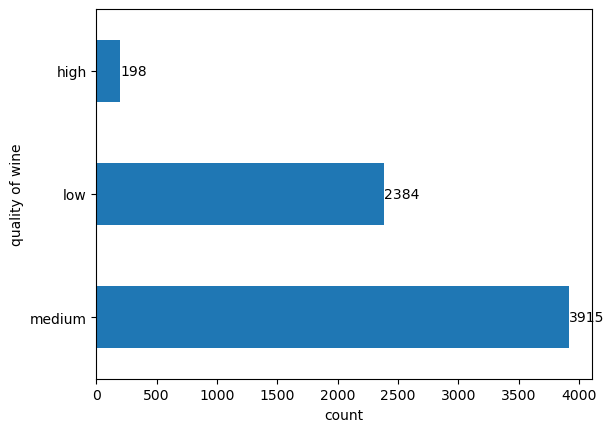

In [24]:
ax = allwines['wine-quality'].value_counts().plot(kind='barh')
ax.set_xlabel('count')
ax.set_ylabel('quality of wine')
ax.bar_label(ax.containers[0])
plt.show()

In [28]:
group_by_type_quality = allwines.groupby(['winetype','wine-quality'])['wine-quality'].count()

In [29]:
group_by_type_quality

winetype    wine-quality
red-wine    low              744
            medium           837
            high              18
white-wine  low             1640
            medium          3078
            high             180
Name: wine-quality, dtype: int64

In [30]:
type(group_by_type_quality)

pandas.core.series.Series

In [37]:
gbtq_df = pd.DataFrame(group_by_type_quality)
print(gbtq_df)


                         wine-quality
winetype   wine-quality              
red-wine   low                    744
           medium                 837
           high                    18
white-wine low                   1640
           medium                3078
           high                   180


In [34]:
print(gbtq_df.columns)
print(gbtq_df['wine-quality'])
print(gbtq_df.index)


Index(['wine-quality'], dtype='object')
winetype    wine-quality
red-wine    low              744
            medium           837
            high              18
white-wine  low             1640
            medium          3078
            high             180
Name: wine-quality, dtype: int64
MultiIndex([(  'red-wine',    'low'),
            (  'red-wine', 'medium'),
            (  'red-wine',   'high'),
            ('white-wine',    'low'),
            ('white-wine', 'medium'),
            ('white-wine',   'high')],
           names=['winetype', 'wine-quality'])


In [42]:
gbtq_df = gbtq_df.rename(columns={'wine-quality':'count'})

In [43]:
gbtq_df

count
winetype   wine-quality       
red-wine   low             744
           medium          837
           high             18
white-wine low            1640
           medium         3078
           high            180

In [44]:
gbtq_df = gbtq_df.reset_index()
print(gbtq_df)

     winetype wine-quality  count
0    red-wine          low    744
1    red-wine       medium    837
2    red-wine         high     18
3  white-wine          low   1640
4  white-wine       medium   3078
5  white-wine         high    180


In [54]:
grouped = gbtq_df.groupby(['winetype','wine-quality'])['count'].sum().unstack() # unstack to put in columns
print(grouped)
# plt.show()

wine-quality   low  medium  high
winetype                        
red-wine       744     837    18
white-wine    1640    3078   180


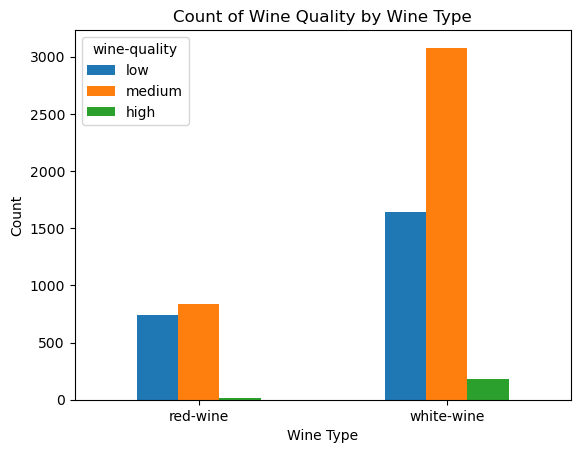

In [51]:
grouped.plot(kind='bar')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.title('Count of Wine Quality by Wine Type')
plt.xticks(rotation=0)

# Show plot
plt.show()